In [9]:
import pickle
import os
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from parameters import setParams
from main import Replay_Sim

## Extract data

In [10]:
# load parameters
params = setParams()
# dictionary of the different replay strategies (models)
models_dict = {'EVB': {'n_plan': 20, 'set_gain_to_one': False, 'set_need_to_one': False},
               'prioritized_sweeping': {'n_plan': 20, 'set_gain_to_one': True, 'set_need_to_one': True},
               'gain_only': {'n_plan': 20, 'set_gain_to_one': False, 'set_need_to_one': True},
               'need_only': {'n_plan': 20, 'set_gain_to_one': True, 'set_need_to_one': False},
               'dyna': {'n_plan': 20, 'set_gain_to_one': True, 'set_need_to_one': True},
               'no_replay': {'n_plan': 0, 'set_gain_to_one': True, 'set_need_to_one': True},
               }
# dictionary of the different environment topologies (mazes)
maze_dict = {}
maze_dict['mattar'] = {
    'size': (6, 9),
    'walls': [[slice(1, 4), 2], [slice(0, 3), 7], [4, 5]],
    'start_state': np.array([[2, 0]]),
    'goal_state.s_1': np.array([[0, 8]]),
    'goal_state.s_2': np.array([[5, 0]]),
    'reward_magnitude.s': np.array([[1]]),
    'reward_std.s': np.array([[0.1]]),
    'reward_prob.s': np.array([[1]])
    }

In [17]:
# extract all of the simulation data
date = '10-05-20/'
model_data = {}
for maze in maze_dict:
    model_data[maze] = {}
    for model in models_dict:
        model_data[maze][model] = {}
        for k in range(params.N_SIMULATIONS):
            with open('experiments/' + date + 'data/' + model + str(k) + '.pkl', 'rb') as f:
                model_data[maze][model][k] = pickle.load(f)

## Steps per episode

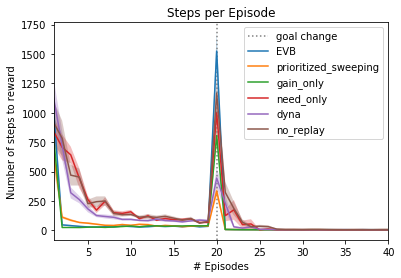

In [72]:
# extract steps per episode and plot figure
fig_1 = plt.figure(1)
x = np.arange(1, params.MAX_N_EPISODES)
fig_title = 'Steps per Episode'
plt.title(fig_title)
plt.ylabel('Number of steps to reward')
plt.xlabel('# Episodes')
plt.xticks(np.arange(0, params.MAX_N_EPISODES+1, 5))
plt.xlim(1, params.MAX_N_EPISODES)
plt.axvline(params.MAX_N_EPISODES/2, linestyle=':', color='gray', label='goal change')

steps_per_episode = {}
for maze in maze_dict:
    steps_per_episode[maze] = {}
    for model in models_dict:
        steps_per_episode[maze][model] = np.empty((params.N_SIMULATIONS, params.MAX_N_EPISODES))
        for k in range(0, params.N_SIMULATIONS):
            steps_per_episode[maze][model][k] = model_data[maze][model][k].steps_per_episode
        # plot figure for model across all simulations
        spe_means = np.nanmean(steps_per_episode[maze][model], axis=0)
        spe_stds = np.std(steps_per_episode[maze][model], axis=0) / np.sqrt(params.N_SIMULATIONS)
        plt.plot(range(1,1+len(spe_means)), spe_means, label=model)
        plt.fill_between(range(1,1+len(spe_means)), spe_means - spe_stds, spe_means + spe_stds, alpha=0.3)
plt.legend(loc="upper right")
file_name = fig_title.replace(" ", "_")
fig_1.savefig('experiments/{}figures/{}.png'.format(date, file_name), dpi=2000)

## Total time per episode

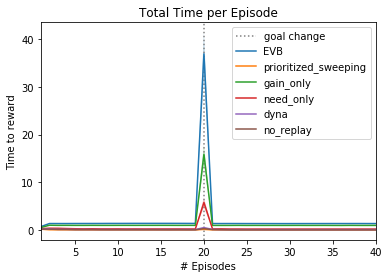

In [76]:
fig_2 = plt.figure(2)
x = np.arange(1, params.MAX_N_EPISODES)
fig_title = 'Total Time per Episode'
plt.title(fig_title)
plt.ylabel('Time to reward')
plt.xlabel('# Episodes')
plt.xticks(np.arange(0, params.MAX_N_EPISODES+1, 5))
plt.xlim(1, params.MAX_N_EPISODES)
plt.axvline(params.MAX_N_EPISODES/2, linestyle=':', color='gray', label='goal change')

time_per_episode = {}
for maze in maze_dict:
    time_per_episode[maze] = {}
    for model in models_dict:
        time_per_episode[maze][model] = np.empty((params.N_SIMULATIONS, params.MAX_N_EPISODES))
        for k in range(params.N_SIMULATIONS):
            time_per_episode[maze][model][k] = model_data[maze][model][k].full_time_per_episode
        # plot figure for model across all simulations
        spe_means = np.nanmean(time_per_episode[maze][model], axis=0)
        spe_stds = np.std(time_per_episode[maze][model], axis=0) / np.sqrt(params.N_SIMULATIONS)
        plt.plot(range(1,1+len(spe_means)), spe_means, label=model)
        plt.fill_between(range(1,1+len(spe_means)), spe_means - spe_stds, spe_means + spe_stds, alpha=0.3)
plt.legend(loc="upper right")
file_name = fig_title.replace(" ", "_")
fig_2.savefig('experiments/{}figures/{}.png'.format(date, file_name), dpi=2000)

## Total time per episode (log)

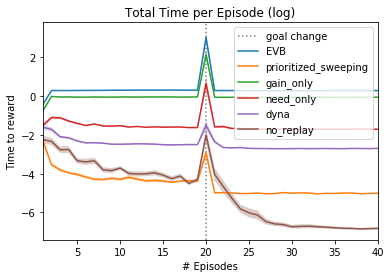

In [77]:
fig_3 = plt.figure(3)
x = np.arange(1, params.MAX_N_EPISODES)
fig_title = 'Total Time per Episode (log)'
plt.title(fig_title)
plt.ylabel('Time to reward')
plt.xlabel('# Episodes')
plt.xticks(np.arange(0, params.MAX_N_EPISODES+1, 5))
plt.xlim(1, params.MAX_N_EPISODES)
plt.axvline(params.MAX_N_EPISODES/2, linestyle=':', color='gray', label='goal change')

time_per_episode = {}
for maze in maze_dict:
    time_per_episode[maze] = {}
    for model in models_dict:
        time_per_episode[maze][model] = np.empty((params.N_SIMULATIONS, params.MAX_N_EPISODES))
        for k in range(params.N_SIMULATIONS):
            time_per_episode[maze][model][k] = model_data[maze][model][k].full_time_per_episode
        # plot figure for model across all simulations
        spe_means = np.nanmean(np.log(time_per_episode[maze][model]), axis=0)
        spe_stds = np.std(np.log(time_per_episode[maze][model]), axis=0) / np.sqrt(params.N_SIMULATIONS)
        plt.plot(range(1,1+len(spe_means)), spe_means, label=model)
        plt.fill_between(range(1,1+len(spe_means)), spe_means - spe_stds, spe_means + spe_stds, alpha=0.3)
plt.legend(loc="upper right")
file_name = fig_title.replace(" ", "_")
fig_3.savefig('experiments/{}figures/{}.png'.format(date, file_name), dpi=2000)

In [ ]:
# fig_3 = plt.figure(3)
# x = np.arange(params.MAX_N_EPISODES)
# plt.ylabel('Average gain')
# plt.xlabel('# Episodes')
# plt.title('Average gain over time')
# plt.xticks(np.arange(0, params.MAX_N_EPISODES + 1, 5))
# plt.xlim(0, params.MAX_N_EPISODES)

# average_gains = {}
# for maze in maze_dict:
#     average_gains[maze] = {}
#     for model in models_dict:
#         average_gains[maze][model] = np.empty((params.N_SIMULATIONS, params.MAX_N_EPISODES))
#         for k in range(params.N_SIMULATIONS):
#             idx = np.argwhere(np.invert(np.all(np.isnan(model_data[maze][model][k].replay['gain']), axis=1)))
#             gains = model_data[maze][model][k].replay['gain'][idx]
#             gains = gains.reshape((gains.shape[0], gains.shape[2]))
#             average_gains[maze][model][k] = np.nanmean(gains, axis=1)
#         # plot figure for model across all simulations
#         spe_means = np.nanmean(np.log(average_gains[maze][model]), axis=0)
#         spe_stds = np.std(np.log(average_gains[maze][model]), axis=0) / np.sqrt(params.N_SIMULATIONS)
#         plt.plot(spe_means)
#         plt.fill_between(x, spe_means - spe_stds, spe_means + spe_stds, alpha=0.3)

# plt.legend(models_dict.keys())